In [64]:
#Parte 1, Ejercicio 1

# Uilizamos la base de datos del TP 3 para ampliar la información que contiene  "Respondieron"
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_excel("C:\\Users\\Adela\\baseTP3.xlsx")
df = df.drop(columns=['Unnamed: 0', 'cluster_k2', 'cluster_k4', 'cluster_k10', 'cluster_k2_label'], errors='ignore')
no_respondieron = df[df['ESTADO'] == "Entrevista individual no realizada (no respuesta al Cuestionario Individual)"]
respondieron = df[df['ESTADO'] != "Entrevista individual no realizada (no respuesta al Cuestionario Individual)"]
column_names = df.columns.tolist()

In [65]:
from scipy import stats
import numpy as np
from scipy.stats import ttest_ind
import ISLP as islp
import statsmodels.api as sm
#Creamos la variable dummy correspondiente a "Desocupado" 
respondieron['desocupado'] = (respondieron['ESTADO'] == 'Desocupado').astype(int)

#Añadimos otras dummies para incorporar más información de nuestra base datos al modelo
#Dummies incorporadas
respondieron['mujer'] = respondieron['Sexos Relevados'].map({"Mujer": 1, 'Varón': 0})
respondieron['lee_dummy'] = respondieron['Sabe leer y escribir'].map({'Sí': 1, 'No': 2})
respondieron['vp_dummy'] = respondieron['Tiene Vacaciones Pagas'].map({'Sí': 1, 'No': 2})
respondieron["salario_semanal"]=respondieron["salario_semanal"].round(2)

#Ajustamos la variable "Ingreso Per cápita familiar" a la inflación con un deflactor del PBI calculado en el TP3  
respondieron.loc[respondieron['ANO4'] == 2004, 'Ingreso Per Cápita Familiar'] *= 882.22
#Dividimos la informacion para poder armar una tabla de diferencias para cada año 
respondieron_04=respondieron[respondieron['ANO4'] == 2004]
respondieron_24 = respondieron[respondieron['ANO4'] == 2024]
#Designamos la variable dependiente e independiente
y_24 = respondieron_24[["desocupado"]]
x_24 = respondieron_24[['ANO4', 'Ingreso Per Cápita Familiar', 'Años al momento de la encuesta', 'DECCFR', 'IDECCFR',
                        'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR', 'edad2', 'PP3F_TOT', 'PP3E_TOT', 'P21', 
                        'educ', 'salario_semanal', 'horas_trab', 'mujer', 'lee_dummy', 'vp_dummy']]
y_04 = respondieron_04[["desocupado"]]
x_04 = respondieron_04[['ANO4', 'Ingreso Per Cápita Familiar', 'Años al momento de la encuesta', 'DECCFR', 'IDECCFR',
                        'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR', 'edad2', 'PP3F_TOT', 'PP3E_TOT', 'P21', 
                        'educ', 'salario_semanal', 'horas_trab', 'mujer', 'lee_dummy', 'vp_dummy']]
#Reemplazamos todos los NaN por ceros y agregamos la columna de unos
# Para x_24
x_24.replace([np.nan, np.inf, -np.inf], 0, inplace=True)
x_24['intercepto'] = 1

# Para x_04
x_04.replace([np.nan, np.inf, -np.inf], 0, inplace=True)
x_04['intercepto'] = 1


C:\Users\Adela\AppData\Local\Temp\ipykernel_3248\253196524.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['desocupado'] = (respondieron['ESTADO'] == 'Desocupado').astype(int)
C:\Users\Adela\AppData\Local\Temp\ipykernel_3248\253196524.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['mujer'] = respondieron['Sexos Relevados'].map({"Mujer": 1, 'Varón': 0})
C:\Users\Adela\AppData\Local\Temp\ipykernel_3248\253196524.py:12: SettingWithCopyWarning: 
A value is trying to be set on

In [66]:
#Dividimos la información en datos de entrenamiento y testeo:
#Para 2024
x_train_24, x_test_24, y_train_24, y_test_24 = train_test_split(x_24, y_24, test_size=0.3, random_state=444)

x_24.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

#Para 2004
x_train_04, x_test_04, y_train_04, y_test_04 = train_test_split(x_04, y_04, test_size=0.3, random_state=444)

x_04.replace([np.nan, np.inf, -np.inf], 0, inplace=True)


C:\Users\Adela\AppData\Local\Temp\ipykernel_3248\1127838671.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_24.replace([np.nan, np.inf, -np.inf], 0, inplace=True)
C:\Users\Adela\AppData\Local\Temp\ipykernel_3248\1127838671.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_04.replace([np.nan, np.inf, -np.inf], 0, inplace=True)


In [67]:
#Calculamos datos :
# Evaluamos el test-t y el p-valor para cada grupo
#El test-t contrasta las medias entre la muestra de entrenamiento y la de testeo.

#Para 2024
t_test_x_24 = stats.ttest_ind(x_train_24, x_test_24)
t_test_y_24 = stats.ttest_ind(y_train_24, y_test_24)
#Para 2004
t_test_x_04 = stats.ttest_ind(x_train_04, x_test_04)
t_test_y_04 = stats.ttest_ind(y_train_04, y_test_04)


C:\Users\Adela\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:563: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  if is_too_small(samples):


In [68]:
#Tabla de 2004
# Para x_train 2004:
print("Número de observaciones (x_train_04):", x_train_04.shape[0])
print("Media (x_train_04):\n", x_train_04.mean())
print("Desvío estándar (x_train_04):\n", x_train_04.std())

Número de observaciones (x_train_04): 5352
Media (x_train_04):
 ANO4                                2004.000000
Ingreso Per Cápita Familiar       320299.530740
Años al momento de la encuesta        33.763453
DECCFR                                 4.944694
IDECCFR                                0.000000
RDECCFR                                4.650972
GDECCFR                                4.756913
PDECCFR                                0.000000
ADECCFR                                4.737855
edad2                               1655.115845
PP3F_TOT                               1.161435
PP3E_TOT                              17.057922
P21                                  265.865284
educ                                   4.126121
salario_semanal                     5863.791678
horas_trab                            15.364163
mujer                                  0.529709
lee_dummy                              1.038677
vp_dummy                               0.443386
intercepto              

In [69]:
# Para x_test 2004 :
print("Número de observaciones (x_test_04):", x_test_04.shape[0])
print("Media (x_test_04):\n", x_test_04.mean())
print("Desvío estándar (x_test_04):\n", x_test_04.std())

Número de observaciones (x_test_04): 2295
Media (x_test_04):
 ANO4                                2004.000000
Ingreso Per Cápita Familiar       318682.237760
Años al momento de la encuesta        33.131155
DECCFR                                 5.030937
IDECCFR                                0.000000
RDECCFR                                4.726797
GDECCFR                                4.840523
PDECCFR                                0.000000
ADECCFR                                4.805664
edad2                               1610.501089
PP3F_TOT                               0.462309
PP3E_TOT                              17.931155
P21                                  256.839651
educ                                   4.019608
salario_semanal                     5664.726824
horas_trab                            15.346405
mujer                                  0.527233
lee_dummy                              1.048802
vp_dummy                               0.414379
intercepto                

In [70]:
# Para y_train 2004 :
print("Número de observaciones (y_train_04):", y_train_04.shape[0])
print("Media (y_train_04):", y_train_04.mean())
print("Desvío estándar (y_train_04):", y_train_04.std())

Número de observaciones (y_train_04): 5352
Media (y_train_04): desocupado    0.067825
dtype: float64
Desvío estándar (y_train_04): desocupado    0.251469
dtype: float64


In [71]:
# Para y_test 2004 :
print("Número de observaciones (y_test_04):", y_test_04.shape[0])
print("Media (y_test_04):", y_test_04.mean())
print("Desvío estándar (y_test_04):", y_test_04.std())

Número de observaciones (y_test_04): 2295
Media (y_test_04): desocupado    0.071895
dtype: float64
Desvío estándar (y_test_04): desocupado    0.258371
dtype: float64


In [72]:
# T-test 2004 :
print("t_test_x_04:", t_test_x_04)
print("t_test_y_04:", t_test_y_04)
print("p-valor del t_test_x_04:", t_test_x_04.pvalue)
print("p-valor del t_test_y_04:", t_test_y_04.pvalue)

t_test_x_04: TtestResult(statistic=array([        nan,  0.09886799,  1.11711428, -1.19715691,         nan,
       -1.06614374, -1.15876394,         nan, -0.9456017 ,  0.97510592,
        1.21757748, -0.66103272,  0.43965856,  0.80266846,  0.4396586 ,
        0.03026259,  0.19872585, -1.22888408,  1.62726392,         nan]), pvalue=array([       nan, 0.92124568, 0.26398057, 0.23128252,        nan,
       0.28639234, 0.24658861,        nan, 0.34438166, 0.32953857,
       0.22342216, 0.50861125, 0.66019685, 0.42219134, 0.66019682,
       0.97585842, 0.84248249, 0.2191531 , 0.10372227,        nan]), df=array([7645., 7645., 7645., 7645., 7645., 7645., 7645., 7645., 7645.,
       7645., 7645., 7645., 7645., 7645., 7645., 7645., 7645., 7645.,
       7645., 7645.]))
t_test_y_04: TtestResult(statistic=array([-0.6433558]), pvalue=array([0.52001256]), df=array([7645.]))
p-valor del t_test_x_04: [       nan 0.92124568 0.26398057 0.23128252        nan 0.28639234
 0.24658861        nan 0.34438166 0.3

In [73]:
#Tabla de 2024
#Para x_train 2024 :
print("Número de observaciones (x_train_24):", x_train_24.shape[0])
print("Media (x_train_24):\n", x_train_24.mean())
print("Desvío estándar (x_train_24):\n", x_train_24.std())

Número de observaciones (x_train_24): 4907
Media (x_train_24):
 ANO4                                2024.000000
Ingreso Per Cápita Familiar       160624.514926
Años al momento de la encuesta        38.031384
DECCFR                                 7.960465
IDECCFR                                0.000000
RDECCFR                                7.882413
GDECCFR                                7.927654
PDECCFR                                0.000000
ADECCFR                                7.884858
edad2                               1973.360913
PP3F_TOT                               1.565111
PP3E_TOT                              18.777665
P21                               118203.810882
educ                                   8.959242
salario_semanal                     2955.095272
horas_trab                            15.225596
mujer                                  0.524557
lee_dummy                              1.028531
vp_dummy                               0.435093
intercepto              

In [74]:
#Para x_test 2024 :
print("Número de observaciones (x_test_24):", x_test_24.shape[0])
print("Media (x_test_24):\n", x_test_24.mean())
print("Desvío estándar (x_test_24):\n", x_test_24.std())

Número de observaciones (x_test_24): 2103
Media (x_test_24):
 ANO4                                2024.000000
Ingreso Per Cápita Familiar       161901.385711
Años al momento de la encuesta        37.561579
DECCFR                                 8.084165
IDECCFR                                0.000000
RDECCFR                                8.003329
GDECCFR                                8.047076
PDECCFR                                0.000000
ADECCFR                                8.008084
edad2                               1924.412744
PP3F_TOT                               0.570613
PP3E_TOT                              18.916786
P21                               127931.526391
educ                                   8.954826
salario_semanal                     3198.288160
horas_trab                            16.098906
mujer                                  0.520209
lee_dummy                              1.037090
vp_dummy                               0.434617
intercepto                

In [75]:
#Para y_train 2024 :
print("Número de observaciones (y_train_24):", y_train_24.shape[0])
print("Media (y_train_24):", y_train_24.mean())
print("Desvío estándar (y_train_24):", y_train_24.std())

Número de observaciones (y_train_24): 4907
Media (y_train_24): desocupado    0.042185
dtype: float64
Desvío estándar (y_train_24): desocupado    0.201031
dtype: float64


In [76]:
#Para y_test 2024 :
print("Número de observaciones (y_test_24):", y_test_24.shape[0])
print("Media (y_test_24):", y_test_24.mean())
print("Desvío estándar (y_test_24):", y_test_24.std())

Número de observaciones (y_test_24): 2103
Media (y_test_24): desocupado    0.049453
dtype: float64
Desvío estándar (y_test_24): desocupado    0.216864
dtype: float64


In [77]:
#T-test 2024 : 
print("t_test_x_24:", t_test_x_24)
print("t_test_y_24:", t_test_y_24)
print("p-valor del t_test_x_24:", t_test_x_24.pvalue)
print("p-valor del t_test_y_24:", t_test_y_24.pvalue)

#Con esta información armamos nuestra tabla de diferencia de medias

t_test_x_24: TtestResult(statistic=array([        nan, -0.12695173,  0.78812765, -1.15894591,         nan,
       -1.12645028, -1.11482078,         nan, -1.14849498,  0.96637098,
        1.42091339, -0.08278678, -1.20206943,  0.03254629, -1.20206943,
       -1.54528694,  0.33392808, -1.34608421,  0.02740987,         nan]), pvalue=array([       nan, 0.89898225, 0.4306487 , 0.24651772,        nan,
       0.26001355, 0.26496546,        nan, 0.25080348, 0.33389193,
       0.15538643, 0.93402344, 0.22937724, 0.97403733, 0.22937724,
       0.12232203, 0.73844382, 0.1783189 , 0.9781336 ,        nan]), df=array([7008., 7008., 7008., 7008., 7008., 7008., 7008., 7008., 7008.,
       7008., 7008., 7008., 7008., 7008., 7008., 7008., 7008., 7008.,
       7008., 7008.]))
t_test_y_24: TtestResult(statistic=array([-1.35438715]), pvalue=array([0.17565656]), df=array([7008.]))
p-valor del t_test_x_24: [       nan 0.89898225 0.4306487  0.24651772        nan 0.26001355
 0.26496546        nan 0.25080348 0.

In [78]:
#Parte 1, Ejercicio 2: 

#Debemos conformar nuestro modelo de regresión únicamente para los ocupados de la EPH

# Establecemos primero una base de datos que solo comprenda información para los ocupados de la EPH en nuestra región
ocu=respondieron[respondieron["ESTADO"] == "Ocupado"]

#Creamos la columna de unos
ocu['intercepto'] = 1
ocu.rename(columns={'Años al momento de la encuesta': 'edad'}, inplace=True)

C:\Users\Adela\AppData\Local\Temp\ipykernel_3248\1812089906.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocu['intercepto'] = 1
C:\Users\Adela\AppData\Local\Temp\ipykernel_3248\1812089906.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocu.rename(columns={'Años al momento de la encuesta': 'edad'}, inplace=True)


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
# Planteamos nuestra matriz X
X_ocu=ocu[["edad","edad2","intercepto","educ","mujer","vp_dummy", "lee_dummy"]]
Y_ocu=ocu[["salario_semanal"]]

#Dividimos los datos correspondientes en entrenamiento y testeo

x_train_ocu,x_test_ocu,y_train_ocu,y_test_ocu=train_test_split(X_ocu,Y_ocu,test_size=0.3, random_state=444)

In [80]:
#Regresión de salario_semanal en edad

X_1 = x_train_ocu[["edad", "intercepto"]]
X_1.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

Y_1 = y_train_ocu["salario_semanal"]
Y_1.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

model = sm.OLS(Y_1, X_1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        salario_semanal   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     20.39
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           6.49e-06
Time:                        22:41:12   Log-Likelihood:                -48323.
No. Observations:                4412   AIC:                         9.665e+04
Df Residuals:                    4410   BIC:                         9.666e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
edad          67.1859     14.880      4.515      0.0

C:\Users\Adela\AppData\Local\Temp\ipykernel_3248\1284707196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_1.replace([np.nan, np.inf, -np.inf], 0, inplace=True)


In [81]:
#salario_semanal en edad y edad2
X_2 = x_train_ocu[["edad", "edad2", "intercepto"]]
X_2.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

Y_2 = y_train_ocu["salario_semanal"]
Y_2.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

model = sm.OLS(Y_2, X_2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        salario_semanal   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     44.71
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           5.98e-20
Time:                        22:41:12   Log-Likelihood:                -48289.
No. Observations:                4412   AIC:                         9.658e+04
Df Residuals:                    4409   BIC:                         9.660e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
edad         720.0374     80.126      8.986      0.0

C:\Users\Adela\AppData\Local\Temp\ipykernel_3248\3347534445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_2.replace([np.nan, np.inf, -np.inf], 0, inplace=True)


In [82]:
#salario_semanal en edad, edad2 y educ
X_3 = x_train_ocu[["edad", "edad2", "intercepto", "educ"]]
X_3.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

Y_3 = y_train_ocu["salario_semanal"]
Y_3.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

model = sm.OLS(Y_3, X_3)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        salario_semanal   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     31.87
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           2.24e-20
Time:                        22:41:12   Log-Likelihood:                -48286.
No. Observations:                4412   AIC:                         9.658e+04
Df Residuals:                    4408   BIC:                         9.661e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
edad         691.5456     80.907      8.547      0.0

C:\Users\Adela\AppData\Local\Temp\ipykernel_3248\4157050273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_3.replace([np.nan, np.inf, -np.inf], 0, inplace=True)


In [83]:
#salario_semanal en edad,edad2, educ y mujer
X_4 = x_train_ocu[["edad", "edad2", "intercepto", "educ", "mujer"]]
X_4.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

Y_4 = y_train_ocu["salario_semanal"]
Y_4.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

model = sm.OLS(Y_4, X_4)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        salario_semanal   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     43.30
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           1.09e-35
Time:                        22:41:12   Log-Likelihood:                -48248.
No. Observations:                4412   AIC:                         9.651e+04
Df Residuals:                    4407   BIC:                         9.654e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
edad         715.7028     80.276      8.916      0.0

C:\Users\Adela\AppData\Local\Temp\ipykernel_3248\930480014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_4.replace([np.nan, np.inf, -np.inf], 0, inplace=True)


In [84]:
#Regresión de salario_semanal en las variables del punto anterior y vp_dummy y lee_dummy
X_5 = x_train_ocu[["edad", "edad2", "intercepto", "educ", "mujer", "vp_dummy", "lee_dummy"]]
X_5.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

Y_5 = y_train_ocu["salario_semanal"]
Y_5.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

model = sm.OLS(Y_5, X_5)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        salario_semanal   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     31.91
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           8.55e-38
Time:                        22:41:13   Log-Likelihood:                -48240.
No. Observations:                4412   AIC:                         9.649e+04
Df Residuals:                    4405   BIC:                         9.654e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
edad         697.9497     80.355      8.686      0.0

In [85]:
# Parte B - Punto 3
# Enfoque de validación

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [86]:
# Antes de arrancar, verificamos si existen valores NaN.
print(x_test_ocu.isnull().sum())
print(y_test_ocu.isnull().sum())

edad            0
edad2           0
intercepto      0
educ          417
mujer           0
vp_dummy      516
lee_dummy       1
dtype: int64
salario_semanal    401
dtype: int64


In [87]:
# Ennumeramos variables del 1-5 para cada modelo. Esto va a facilitar el análisis
modelo_variables = {
    1: ['edad', 'intercepto'],
    2: ['edad', 'edad2', 'intercepto'],
    3: ['edad', 'edad2', 'intercepto', 'educ'],
    4: ['edad', 'edad2', 'intercepto', 'educ', 'mujer'],
    5: ['edad', 'edad2', 'intercepto', 'educ', 'mujer', 'vp_dummy', 'lee_dummy']
}

# Observamos previamente que muchas variables tienen NaN.
# Para ello, vamos a imputar valores predictivos; en el caso de la variable educ, usamos la mediana, para las dummies, la moda.
x_test_ocu['educ'] = x_test_ocu['educ'].fillna(x_test_ocu['educ'].median())
x_test_ocu['vp_dummy'] = x_test_ocu['vp_dummy'].fillna(x_test_ocu['vp_dummy'].mode()[0])
x_test_ocu['lee_dummy'] = x_test_ocu['lee_dummy'].fillna(x_test_ocu['lee_dummy'].mode()[0])

# Además, eliminamos filas de la base de testeo donde falta la variable objetivo (salario_semanal).
y_test_ocu = y_test_ocu.dropna(subset=['salario_semanal'])
x_test_ocu = x_test_ocu.loc[y_test_ocu.index]

# Guardamos las métricas
metrics = {}

for i in range(1,6):
    vars_i = modelo_variables[i]
    
    # Preparamos los datos de entrenamiento y entrenamos el modelo
    X_train_i = x_train_ocu[vars_i].replace([np.nan, np.inf, -np.inf], 0)
    Y_train_i = y_train_ocu['salario_semanal'].replace([np.nan, np.inf, -np.inf], 0)
    
    model_i = sm.OLS(Y_train_i, X_train_i)
    results_i = model_i.fit()

    # Preparamos los datos de testeo
    X_test_i = x_test_ocu[vars_i].replace([np.nan, np.inf, -np.inf], 0)
    Y_test_true = y_test_ocu['salario_semanal']
    coef_i = results_i.params
    y_pred_i = X_test_i @ coef_i
    
    # Calculamos las métricas (mse test, rmse test, mae test)
    mse_i = mean_squared_error(Y_test_true, y_pred_i)
    rmse_i = np.sqrt(mse_i)
    mae_i = mean_absolute_error(Y_test_true, y_pred_i)
    
    metrics[i] = {
        'MSE': mse_i,
        'RMSE': rmse_i,
        'MAE': mae_i,
    }
    
    print(f"Modelo {i} {vars_i}")
    print(f"  MSE: {mse_i:.2f}, RMSE: {rmse_i:.2f}, MAE: {mae_i:.2f}\n")

Modelo 1 ['edad', 'intercepto']
  MSE: 1132976695.39, RMSE: 33659.72, MAE: 8878.36

Modelo 2 ['edad', 'edad2', 'intercepto']
  MSE: 1128820310.98, RMSE: 33597.92, MAE: 8867.12

Modelo 3 ['edad', 'edad2', 'intercepto', 'educ']
  MSE: 1124998171.89, RMSE: 33540.99, MAE: 8808.23

Modelo 4 ['edad', 'edad2', 'intercepto', 'educ', 'mujer']
  MSE: 1114844642.31, RMSE: 33389.29, MAE: 8520.20

Modelo 5 ['edad', 'edad2', 'intercepto', 'educ', 'mujer', 'vp_dummy', 'lee_dummy']
  MSE: 1115022751.02, RMSE: 33391.96, MAE: 8404.56



In [88]:
# Creamos un df con los valores de las métricas.

data = []
for model_num, vals in metrics.items():
    data.append({
        'Modelo': model_num,
        'MSE': vals['MSE'],
        'RMSE': vals['RMSE'],
        'MAE': vals['MAE']
    })
df_metrics = pd.DataFrame(metrics).T
df_metrics.index.name = "Modelo"
df_metrics_formateado = df_metrics.round(2).apply(lambda col: col.map('{:,.2f}'.format))
df_metrics_formateado.to_excel('metricas.xlsx') # Lo exportamos a un excel para completar la tabla.
df_metrics_formateado

,MSE,RMSE,MAE
Modelo,,,
1,"1,132,976,695.39","33,659.72","8,878.36"
2,"1,128,820,310.98","33,597.92","8,867.12"
3,"1,124,998,171.89","33,540.99","8,808.23"
4,"1,114,844,642.31","33,389.29","8,520.20"
5,"1,115,022,751.02","33,391.96","8,404.56"


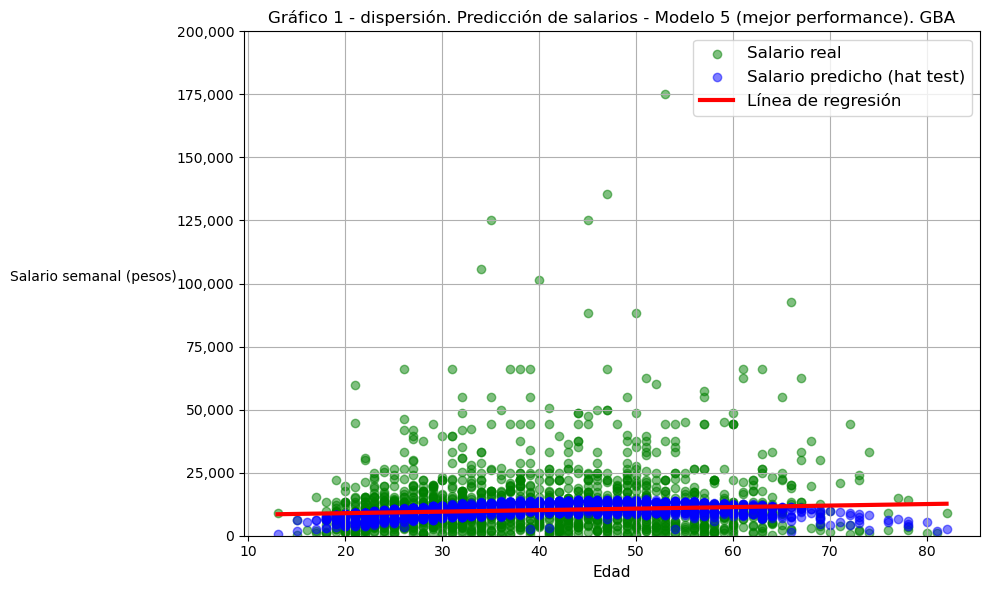

In [89]:
# Parte B - Punto 4
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# Gráfico de dispersión para el modelo de mejor performance

# Vamos a usar las predicciones del modelo 5, ya que este presenta el menor MSE y MAE de testeo.
variables_modelo_5 = ['edad', 'edad2', 'intercepto', 'educ', 'mujer', 'vp_dummy', 'lee_dummy']
x_test_ocu['educ'] = x_test_ocu['educ'].fillna(x_test_ocu['educ'].median())
x_test_ocu['vp_dummy'] = x_test_ocu['vp_dummy'].fillna(x_test_ocu['vp_dummy'].mode()[0])
x_test_ocu['lee_dummy'] = x_test_ocu['lee_dummy'].fillna(x_test_ocu['lee_dummy'].mode()[0])
x_test_ocu = x_test_ocu.loc[y_test_ocu.index]

X_test_5 = x_test_ocu[variables_modelo_5].replace([np.nan, np.inf, -np.inf], 0)
y_pred_5 = results_i.predict(X_test_5)

# Creamos un DataFrame para graficar
df_grafico_5 = X_test_5.copy()
df_grafico_5["edad"] = x_test_ocu["edad"]
df_grafico_5["salario_semanal"] = y_test_ocu["salario_semanal"].values
df_grafico_5["salario_semanal_hat_test"] = y_pred_5.values

# Realizamos el gráfico de scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_grafico_5["edad"], df_grafico_5["salario_semanal"], color="green", alpha=0.5, label="Salario real")
plt.scatter(df_grafico_5["edad"], df_grafico_5["salario_semanal_hat_test"], color="blue", alpha=0.5, label="Salario predicho (hat test)")

# Usamos la librería de numpy para graficar una línea de regresión; esto nos va a facilitar la visualización de los datos predichos
coef = np.polyfit(df_grafico_5["edad"], df_grafico_5["salario_semanal_hat_test"], 1)
linea_regresion = np.poly1d(coef)
edades = np.linspace(df_grafico_5["edad"].min(), df_grafico_5["edad"].max(), 100)
salarios_predichos_linea = linea_regresion(edades)
plt.plot(edades, salarios_predichos_linea, color="red", linewidth=3, label="Línea de regresión")

plt.xlabel("Edad", fontsize=11)
plt.ylabel("Salario semanal (pesos)", rotation=0, labelpad=60, fontsize=10)
plt.title("Gráfico 1 - dispersión. Predicción de salarios - Modelo 5 (mejor performance). GBA", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.ylim(0, 200000)
plt.tight_layout()
plt.savefig("scatter_modelo5.png", bbox_inches="tight", dpi=300)
plt.show()


--- Logit ---
Matriz de confusión:
[[128 213]
 [ 83 678]]
Accuracy: 0.7313974591651543
AUC: 0.733124342488083


C:\Users\Adela\AppData\Local\Temp\ipykernel_3248\2191148817.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['mujer'] = respondieron['Sexos Relevados'].map({"Mujer": 1, 'Varón': 0})
C:\Users\Adela\AppData\Local\Temp\ipykernel_3248\2191148817.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['lee_dummy'] = respondieron['Sabe leer y escribir'].map({'Sí': 1, 'No': 2})
C:\Users\Adela\AppData\Local\Temp\ipykernel_3248\2191148817.py:16: SettingWithCopyWarning: 
A value is trying t

<Figure size 640x480 with 0 Axes>

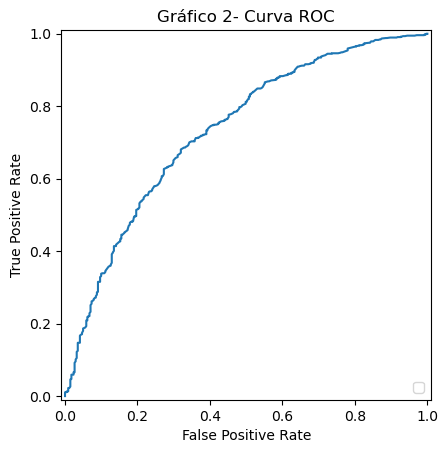

C:\Users\Adela\anaconda3\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")



--- KNN (k=5) ---
Matriz de confusión:
[[145 196]
 [143 618]]
Accuracy: 0.6923774954627949
AUC: 0.669220927857696


<Figure size 640x480 with 0 Axes>

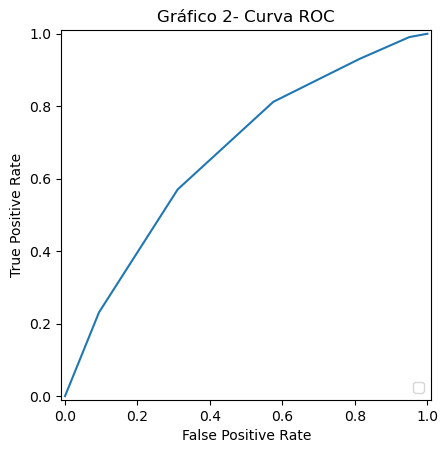

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Filtro solo ocupados
ocu = respondieron[respondieron["ESTADO"] == "Ocupado"].copy()
ocu['intercepto'] = 1
ocu.rename(columns={'Años al momento de la encuesta': 'edad'}, inplace=True)

# Dummies y auxiliares
respondieron['mujer'] = respondieron['Sexos Relevados'].map({"Mujer": 1, 'Varón': 0})
respondieron['lee_dummy'] = respondieron['Sabe leer y escribir'].map({'Sí': 1, 'No': 2})
respondieron['vp_dummy'] = respondieron['Tiene Vacaciones Pagas'].map({'Sí': 1, 'No': 2})
respondieron["salario_semanal"]=respondieron["salario_semanal"].round(2)

# VARIABLE OBJETIVO BINARIA: ejemplo vacaciones pagas
# (1=Sí, 0=No)
ocu['objetivo'] = ocu['vp_dummy'].map({1: 1, 2: 0})

# Elimino filas con NaN en X o y
cols_X = ["edad", "intercepto", "educ", "mujer", "lee_dummy"]
modelo_df = ocu.dropna(subset=['objetivo'] + cols_X)
X = modelo_df[cols_X]
y = modelo_df['objetivo']

# Split entrenamiento/testeo
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=444)

# Imputación de NaN en X
x_train = x_train.fillna(x_train.mean())
x_test = x_test.fillna(x_train.mean())

# LOGIT
logit = LogisticRegression(max_iter=1000)
logit.fit(x_train, y_train)
logit_probs = logit.predict_proba(x_test)[:, 1]
logit_pred = (logit_probs > 0.5).astype(int)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
knn_probs = knn.predict_proba(x_test)[:, 1]
knn_pred = (knn_probs > 0.5).astype(int)

# Reporte métricas y ROC
def report_metrics(y_true, y_pred, y_prob, nombre="Modelo"):
    print(f"\n--- {nombre} ---")
    print("Matriz de confusión:")
    print(confusion_matrix(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    auc = roc_auc_score(y_true, y_prob)
    print("AUC:", auc)
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.figure()
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    plt.title("Gráfico 2- Curva ROC", fontsize=12)
    plt.show()

report_metrics(y_test, logit_pred, logit_probs, nombre="Logit")
report_metrics(y_test, knn_pred, knn_probs, nombre="KNN (k=5)")

In [91]:
# Usando la misma lógica y variables auxiliares del punto 5

# Preparo la base no_respondieron
no_respondieron['intercepto'] = 1
no_respondieron = no_respondieron.rename(columns={'Años al momento de la encuesta': 'edad'}, inplace=False)
no_respondieron['mujer'] = no_respondieron['Sexos Relevados'].map({'Mujer': 1, 'Varón': 0})
no_respondieron['lee_dummy'] = no_respondieron['Sabe leer y escribir'].map({'Sí': 1, 'No': 2})
no_respondieron['vp_dummy'] = no_respondieron['Tiene Vacaciones Pagas'].map({'Sí': 1, 'No': 2})
no_respondieron['salario_semanal'] = no_respondieron['salario_semanal'].round(2)

# Variables predictoras y objetivo
cols_X = ['edad', 'intercepto', 'educ', 'mujer', 'lee_dummy']
X_noresp = no_respondieron[cols_X].copy()

# Imput valores faltantes igual que en entrenamiento
X_noresp = X_noresp.fillna(x_train.mean())

# el modelo logit entrenado
# Asegúro que 'logit' sea el modelo ya entrenado en el punto 5
noresp_probs = logit.predict_proba(X_noresp)[:, 1]
noresp_pred = (noresp_probs > 0.5).astype(int)

# Calculo proporción de desocupados predichos
proporcion_desocupados = noresp_pred.sum() / len(noresp_pred)
print(f"Proporción de personas identificadas como desocupadas en norespondieron: {proporcion_desocupados:.2%}")

Proporción de personas identificadas como desocupadas en norespondieron: 80.49%


C:\Users\Adela\AppData\Local\Temp\ipykernel_3248\202456789.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_respondieron['intercepto'] = 1
